In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import millify as mil
import warnings
warnings.filterwarnings("ignore")
# from numerize import numerize as num
# house_type_sales["total amount"]= house_type_sales["total amount"].apply(num.numerize) to numerize the number

In [65]:
data = pd.read_parquet("DKHousingPrices.parquet")

In [66]:
data = data[data.year_build >=1970].reset_index(drop=True)
data.sample(10)

date quarter  house_id   house_type    sales_type  year_build  \
413102 2011-06-21  2011Q2    898385        Villa  regular_sale        2012   
145679 2021-02-25  2021Q1    314402        Villa  regular_sale        2007   
616297 1996-02-29  1996Q1   1422353        Villa  regular_sale        1989   
497814 2006-03-05  2006Q1   1103881        Villa  regular_sale        2007   
426307 2010-09-01  2010Q3    928835        Villa  regular_sale        1970   
61360  2023-01-26  2023Q1    127464  Summerhouse  regular_sale        1977   
118980 2021-07-22  2021Q3    259999        Villa  regular_sale        1995   
171770 2020-09-20  2020Q3    369679        Villa  regular_sale        2018   
584204 1999-09-20  1999Q3   1328887    Townhouse  regular_sale        1970   
354074 2014-12-01  2014Q4    761342    Apartment  regular_sale        2005   

        purchase_price  %_change_between_offer_and_purchase  no_rooms    sqm  \
413102         1950000                                 -2.0         4  158.0   
145679         3800000                                 -5.0         8  183.0   
616297          940000                                  0.0         4  116.0   
497814          275630                                  0.0         6  171.0   
426307         1750000                                 -4.0         4  159.0   
61360          2025000                                 -4.0         3   57.0   
118980          995000                                  0.0         5  148.0   
171770         3295000                                  0.0         5  167.0   
584204          432000                                  0.0         2   73.0   
354074         1860000                                 -5.0         3   99.0   

           sqm_price                  address  zip_code         city  \
413102  12341.772461            Sydkærsvej 63      2650     Hvidovre   
145679  20765.027344         Søvangsparken 65      5300   Kerteminde   
616297   8103.448242             Thanesvej 12      8660  Skanderborg   
497814   1611.871338              Valmuevej 2      7323         Give   
426307  11006.289062          Præstevænget 12      5800       Nyborg   
61360   35526.316406           Dunhammeren 75      5390     Martofte   
118980   6722.973145              Grønvang 13      6510         Gram   
171770  19730.539062          Køllesvinget 15      6100    Haderslev   
584204   5917.808105    Solgårdsvej 8, st. tv      7700      Thisted   
354074  18787.878906  Pakhusstræde 11, st. tv      4300       Holbæk   

                       area         region  nom_interest_rate%  \
413102  Capital, Copenhagen        Zealand                0.75   
145679        Fyn & islands  Fyn & islands                0.00   
616297   East & mid jutland        Jutland                4.25   
497814        South jutland        Jutland                2.25   
426307        Fyn & islands  Fyn & islands                0.75   
61360         Fyn & islands  Fyn & islands                1.75   
118980        South jutland        Jutland                0.00   
171770        South jutland        Jutland                0.00   
584204        South jutland        Jutland                2.75   
354074        Other islands        Zealand                0.00   

        dk_ann_infl_rate%  yield_on_mortgage_credit_bonds%  
413102               2.76                             4.75  
145679               1.85                             1.47  
616297               2.13                             7.84  
497814               1.92                             5.14  
426307               2.31                             4.53  
61360                3.31                             4.79  
118980               1.85                             1.47  
171770               0.42                             1.10  
584204               2.50                             6.60  
354074               0.56                             3.06

In [67]:
data.duplicated().sum()

0

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643103 entries, 0 to 643102
Data columns (total 19 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   date                                 643103 non-null  datetime64[ns]
 1   quarter                              643103 non-null  period[Q-DEC] 
 2   house_id                             643103 non-null  int64         
 3   house_type                           643103 non-null  category      
 4   sales_type                           643103 non-null  category      
 5   year_build                           643103 non-null  int16         
 6   purchase_price                       643103 non-null  int32         
 7   %_change_between_offer_and_purchase  643103 non-null  float32       
 8   no_rooms                             643103 non-null  int8          
 9   sqm                                  643102 non-null  float32       
 

In [69]:
data[data["sqm"].isna()]

date quarter  house_id   house_type    sales_type  year_build  \
488620 2006-08-21  2006Q3   1082137  Summerhouse  regular_sale        1971   

        purchase_price  %_change_between_offer_and_purchase  no_rooms  sqm  \
488620          995000                                  0.0         2  NaN   

        sqm_price        address  zip_code    city           area   region  \
488620        NaN  Fjordengen 12      4300  Holbæk  Other islands  Zealand   

        nom_interest_rate%  dk_ann_infl_rate%  yield_on_mortgage_credit_bonds%  
488620                2.75               1.92                             5.14

In [70]:
#set a query for Summerhouse on the same area, same zip code , same purchase_price range and same room num to get the miss values
zealand_villa = data[(data["region"]== "Zealand") & (data["house_type"]=="Summerhouse") & ( data["purchase_price"] < 1000000) & (data["purchase_price"] > 990000 ) & (data["zip_code"] ==4300) & (data["no_rooms"] == 2)]
zealand_villa[["sqm" , "sqm_price"]].describe().round(3)
# so i will fillna with mean value for sqm 44.000 and sqm_price 23361.641

sqm  sqm_price
count   2.000      2.000
mean   44.000  23361.641
std    11.314   5977.917
min    36.000  19134.615
25%    40.000  21248.129
50%    44.000  23361.641
75%    48.000  25475.152
max    52.000  27588.666

In [71]:
# data.loc[212845,["sqm" , "sqm_price"]] = 85 , 23077.189
data.loc[488620,["sqm" , "sqm_price"]] = 44.000 , 23361.641

In [72]:
data.iloc[488620]

date                                   2006-08-21 00:00:00
quarter                                             2006Q3
house_id                                           1082137
house_type                                     Summerhouse
sales_type                                    regular_sale
year_build                                            1971
purchase_price                                      995000
%_change_between_offer_and_purchase                    0.0
no_rooms                                                 2
sqm                                                   44.0
sqm_price                                        23361.641
address                                      Fjordengen 12
zip_code                                              4300
city                                                Holbæk
area                                         Other islands
region                                             Zealand
nom_interest_rate%                                    2.

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643103 entries, 0 to 643102
Data columns (total 19 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   date                                 643103 non-null  datetime64[ns]
 1   quarter                              643103 non-null  period[Q-DEC] 
 2   house_id                             643103 non-null  int64         
 3   house_type                           643103 non-null  category      
 4   sales_type                           643103 non-null  category      
 5   year_build                           643103 non-null  int16         
 6   purchase_price                       643103 non-null  int32         
 7   %_change_between_offer_and_purchase  643103 non-null  float32       
 8   no_rooms                             643103 non-null  int8          
 9   sqm                                  643103 non-null  float32       
 

In [74]:
# remove dk_ann_infl_rate% & yield_on_mortgage_credit_bonds% columns from data
data.drop( columns= ["dk_ann_infl_rate%","yield_on_mortgage_credit_bonds%"], inplace=True )

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643103 entries, 0 to 643102
Data columns (total 17 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   date                                 643103 non-null  datetime64[ns]
 1   quarter                              643103 non-null  period[Q-DEC] 
 2   house_id                             643103 non-null  int64         
 3   house_type                           643103 non-null  category      
 4   sales_type                           643103 non-null  category      
 5   year_build                           643103 non-null  int16         
 6   purchase_price                       643103 non-null  int32         
 7   %_change_between_offer_and_purchase  643103 non-null  float32       
 8   no_rooms                             643103 non-null  int8          
 9   sqm                                  643103 non-null  float32       
 

In [76]:
data.sample(8)

date quarter  house_id house_type    sales_type  year_build  \
178642 2020-08-04  2020Q3    383836      Villa  regular_sale        1981   
173930 2020-09-06  2020Q3    374156  Apartment  regular_sale        2022   
249383 2018-12-06  2018Q4    531401      Villa  regular_sale        1978   
326767 2015-12-21  2015Q4    699148  Townhouse  regular_sale        2016   
71799  2022-09-06  2022Q3    154232  Townhouse  regular_sale        1995   
431041 2010-05-26  2010Q2    939623      Villa  regular_sale        1976   
485877 2006-10-15  2006Q4   1073626      Villa  regular_sale        2009   
537999 2003-11-03  2003Q4   1201882      Villa  regular_sale        2006   

        purchase_price  %_change_between_offer_and_purchase  no_rooms    sqm  \
178642         1600000                                 -6.0         5  146.0   
173930         2500000                                  0.0         3   96.0   
249383         1450000                                  0.0         5  148.0   
326767         2295000                                  0.0         3  116.0   
71799          2200000                                 -4.0         4  110.0   
431041         2130000                                 -5.0         4  120.0   
485877          900000                                  0.0         5  168.0   
537999          650000                                  0.0         5  245.0   

           sqm_price                   address  zip_code           city  \
178642  10958.904297  Holger Drachmanns Vej 2B      9900  Frederikshavn   
173930  26041.666016              Anholtvej 8A      9900  Frederikshavn   
249383   9797.296875              Hammervej 11      7080         Børkop   
326767  19784.482422                 Brynet 22      4300         Holbæk   
71799   20000.000000              Røddingvej 7      8600      Silkeborg   
431041  17750.000000       Skovgårdsvænget 622      8310    Tranbjerg J   
485877   5357.143066             Louisehaven 9      4681       Herfølge   
537999   2653.061279              Stenbjerg 16      9850      Hirtshals   

                      area   region  nom_interest_rate%  
178642       North jutland  Jutland                0.00  
173930       North jutland  Jutland                0.00  
249383       South jutland  Jutland                0.00  
326767       Other islands  Zealand                0.00  
71799   East & mid jutland  Jutland                0.00  
431041  East & mid jutland  Jutland                0.75  
485877       Other islands  Zealand                3.00  
537999       North jutland  Jutland                2.00

In [77]:
# Add a new column for house age
data["house_age"] = data["date"].dt.year-data["year_build"]
data.sample(10)

date quarter  house_id   house_type    sales_type  year_build  \
53829  2023-04-17  2023Q2    109998        Villa  regular_sale        2000   
590187 1999-02-22  1999Q1   1346005    Townhouse  regular_sale        1980   
171416 2020-09-22  2020Q3    368953    Apartment  regular_sale        2006   
600461 1998-01-04  1998Q1   1375731         Farm  regular_sale        1991   
637943 1992-11-03  1992Q4   1490670        Villa  regular_sale        1976   
12075  2024-05-27  2024Q2      9524    Apartment  regular_sale        2019   
539872 2003-09-21  2003Q3   1206550        Villa  regular_sale        1976   
236956 2019-04-11  2019Q2    504442    Apartment  regular_sale        2002   
74258  2022-08-10  2022Q3    160145  Summerhouse   family_sale        2017   
351358 2015-01-24  2015Q1    754929    Apartment  regular_sale        1987   

        purchase_price  %_change_between_offer_and_purchase  no_rooms    sqm  \
53829          2525000                                 -3.0         7  240.0   
590187          885705                                  0.0         5  129.0   
171416         3350000                                  2.0         2   81.0   
600461         1017095                                  0.0         6  186.0   
637943          765000                                  0.0         7  167.0   
12075          6900000                                 -7.0         3  126.0   
539872         2109505                                  0.0         5  180.0   
236956         1950000                                 -2.0         3   68.0   
74258          1147500                                  0.0         3   59.0   
351358         1300000                                 -3.0         4   90.0   

           sqm_price                    address  zip_code         city  \
53829   10520.833008             Stubmøllevej 7      4800   Nykøbing F   
590187   6865.930176               Lykkesvej 10      6800        Varde   
171416  41358.023438  Weidekampsgade 65, st. tv      2300  København S   
600461   5468.252930             Vester Søvej 4      9681        Ranum   
637943   4580.838379              Farøvænget 26      8381        Tilst   
12075   54761.906250       Kompagnivej 9, 3. tv      3520        Farum   
539872  11719.472656           Svenstrupvang 11      4622      Havdrup   
236956  28676.470703         Egelykkeparken 22A      2670        Greve   
74258   19449.152344              Buskrenden 12      9800     Hjørring   
351358  14444.444336     Jernbanegade 24, 1. th      7100        Vejle   

                       area   region  nom_interest_rate%  house_age  
53829         Other islands  Zealand                 2.6         23  
590187        South jutland  Jutland                 3.5         19  
171416  Capital, Copenhagen  Zealand                 0.0         14  
600461        North jutland  Jutland                 3.5          7  
637943   East & mid jutland  Jutland                 9.5         16  
12075         North Zealand  Zealand                 3.6          5  
539872        Other islands  Zealand                 2.0         27  
236956  Capital, Copenhagen  Zealand                 0.0         17  
74258         North jutland  Jutland                 0.0          5  
351358        South jutland  Jutland                 0.0         28

In [78]:
# data["purchase_year"] = data["date"].dt.year
data

date quarter  house_id   house_type    sales_type  year_build  \
0      2024-10-26  2024Q4         0        Villa  regular_sale        1974   
1      2024-10-24  2024Q4        14        Villa  regular_sale        1979   
2      2024-10-24  2024Q4        23        Villa  regular_sale        2014   
3      2024-10-24  2024Q4        22  Summerhouse  regular_sale        1979   
4      2024-10-24  2024Q4        20  Summerhouse  regular_sale        1979   
...           ...     ...       ...          ...           ...         ...   
643098 1992-01-05  1992Q1   1505874    Apartment  regular_sale        1986   
643099 1992-01-05  1992Q1   1505862        Villa  regular_sale        1970   
643100 1992-01-05  1992Q1   1505861        Villa  regular_sale        1972   
643101 1992-01-05  1992Q1   1505858        Villa   family_sale        1972   
643102 1992-01-05  1992Q1   1505875        Villa  regular_sale        1989   

        purchase_price  %_change_between_offer_and_purchase  no_rooms    sqm  \
0              4350000                                  0.0         5  215.0   
1              3000000                                  0.0         6  208.0   
2              4535000                                 -3.0         6  189.0   
3              1100000                                 -8.0         3   70.0   
4              1070000                                 -2.0         4   76.0   
...                ...                                  ...       ...    ...   
643098          426692                                  0.0         2   61.0   
643099          975000                                  0.0         7  186.0   
643100         1004000                                  0.0         6  156.0   
643101          750000                                  0.0         4  160.0   
643102         1156150                                  0.0         6  157.0   

           sqm_price               address  zip_code        city  \
0       20232.558594         Kildevangen 5      8382    Hinnerup   
1       14423.077148           Vesterled 7      8300       Odder   
2       23994.708984           Mosevang 10      7300     Jelling   
3       15714.286133      Rønnebærvænget 3      6094       Hejls   
4       14078.947266         Olymposvej 23      4200    Slagelse   
...              ...                   ...       ...         ...   
643098   6994.950684      Grønnegården 418      2670       Greve   
643099   5241.935547     Margrethe Alle 44      2690  Karlslunde   
643100   6435.897461         Tornekrogen 9      3500     Værløse   
643101   4687.500000  P O Pedersens Vej 40      7500   Holstebro   
643102   7364.012695           Ãgirsvej 3      3650    Alstykke   

                       area   region  nom_interest_rate%  house_age  
0        East & mid jutland  Jutland                 3.1         50  
1        East & mid jutland  Jutland                 3.1         45  
2             South jutland  Jutland                 3.1         10  
3             South jutland  Jutland                 3.1         45  
4             Other islands  Zealand                 3.1         45  
...                     ...      ...                 ...        ...  
643098  Capital, Copenhagen  Zealand                 9.5          6  
643099  Capital, Copenhagen  Zealand                 9.5         22  
643100        North Zealand  Zealand                 9.5         20  
643101        South jutland  Jutland                 9.5         20  
643102        North Zealand  Zealand                 9.5          3  

[643103 rows x 18 columns]

In [85]:
data.groupby(["date"])["purchase_price"].sum().reset_index()
px.line(data.groupby(["date"])["purchase_price"].sum().reset_index() , x= "date", y="purchase_price")

In [97]:
# data["purchase_year"] = data["date"].dt.year
# data[data["purchase_year"]==2017]
data[data["quarter"]=="2017Q2"]
# we do not have any sales during 1st and 2nd Q in 2017. 

Empty DataFrame
Columns: [date, quarter, house_id, house_type, sales_type, year_build, purchase_price, %_change_between_offer_and_purchase, no_rooms, sqm, sqm_price, address, zip_code, city, area, region, nom_interest_rate%, house_age, purchase_year]
Index: []

In [18]:
# #set a query for villas on the same area, same purchase_price range and same room num to get the mis vals
# zealand_villa = data[(data["region"]== "Zealand") & (data["house_type"]=="Villa") & ( data["purchase_price"] < 2000000) & (data["purchase_price"] > 1900000 ) & (data["no_rooms"] == 2)]
# zealand_villa[["sqm" , "sqm_price"]].describe().round(3)
# so i will fillna with median value for sqm 85.000 and sqm_price 23077.189

In [19]:
data.sales_type.unique()

['regular_sale', 'other_sale', 'family_sale', 'auction', '-']
Categories (5, object): ['-', 'auction', 'family_sale', 'other_sale', 'regular_sale']

## New df cols will be: 
<div>
<table style="height: 36px;" width="548">
<tbody>
<tr>
<td style="width: 49.4929px;">
<table class="dataframe" style="height: 27px;" border="1" width="1014">
<thead>
<tr>
<th style="width: 35.7783px;">house_id</th>
<th style="width: 73.5731px;">date</th>
<th style="width: 51.7689px;">region</th>
<th style="width: 29.316px;">city</th>
<th style="width: 94.092px;">house_type</th>
<th style="width: 85.9906px;">year_build</th>
<th style="width: 80.908px;">no_rooms</th>
<th style="width: 33.8326px;">sqm</th>
<th style="width: 84.0802px;">sqm_price</th>
<th style="width: 87.7948px;">house_age</th>
<th style="width: 124.045px;">purchase_price</th>
<th style="width: 169.8px;">nom_interest_rate%</th>
</tr>

In [20]:
df = data[["house_id","date","region", "city", "house_type", "year_build", "no_rooms", "sqm" , "sqm_price", "house_age", "purchase_price","nom_interest_rate%"]]

In [21]:
df

house_id       date   region        city   house_type  year_build  \
0              0 2024-10-26  Jutland    Hinnerup        Villa        1974   
1             14 2024-10-24  Jutland       Odder        Villa        1979   
2             23 2024-10-24  Jutland     Jelling        Villa        2014   
3             22 2024-10-24  Jutland       Hejls  Summerhouse        1979   
4             20 2024-10-24  Zealand    Slagelse  Summerhouse        1979   
...          ...        ...      ...         ...          ...         ...   
643098   1505874 1992-01-05  Zealand       Greve    Apartment        1986   
643099   1505862 1992-01-05  Zealand  Karlslunde        Villa        1970   
643100   1505861 1992-01-05  Zealand     Værløse        Villa        1972   
643101   1505858 1992-01-05  Jutland   Holstebro        Villa        1972   
643102   1505875 1992-01-05  Zealand    Alstykke        Villa        1989   

        no_rooms    sqm     sqm_price  house_age  purchase_price  \
0              5  215.0  20232.558594         50         4350000   
1              6  208.0  14423.077148         45         3000000   
2              6  189.0  23994.708984         10         4535000   
3              3   70.0  15714.286133         45         1100000   
4              4   76.0  14078.947266         45         1070000   
...          ...    ...           ...        ...             ...   
643098         2   61.0   6994.950684          6          426692   
643099         7  186.0   5241.935547         22          975000   
643100         6  156.0   6435.897461         20         1004000   
643101         4  160.0   4687.500000         20          750000   
643102         6  157.0   7364.012695          3         1156150   

        nom_interest_rate%  
0                      3.1  
1                      3.1  
2                      3.1  
3                      3.1  
4                      3.1  
...                    ...  
643098                 9.5  
643099                 9.5  
643100                 9.5  
643101                 9.5  
643102                 9.5  

[643103 rows x 12 columns]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643103 entries, 0 to 643102
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   house_id            643103 non-null  int64         
 1   date                643103 non-null  datetime64[ns]
 2   region              643103 non-null  category      
 3   city                643103 non-null  object        
 4   house_type          643103 non-null  category      
 5   year_build          643103 non-null  int16         
 6   no_rooms            643103 non-null  int8          
 7   sqm                 643103 non-null  float32       
 8   sqm_price           643103 non-null  float64       
 9   house_age           643103 non-null  int32         
 10  purchase_price      643103 non-null  int32         
 11  nom_interest_rate%  643103 non-null  float32       
dtypes: category(2), datetime64[ns](1), float32(2), float64(1), int16(1), int32(2), int64(1

<hr />
<h3 style="text-align: center;"><strong>Firstly we need to know what is the house types distribution in each region ?</strong></h3>

In [23]:
# How many house types ??
px.pie(df["house_type"].value_counts(), names= df["house_type"].value_counts().index,values=df["house_type"].value_counts().values, title= "Sold House Types Count ").update_layout(title_x=(0.5))

In [24]:
Regions_sales = df.groupby(["region"])["purchase_price"].agg(["sum", "count"]).sort_values(by="sum" , ascending=False).reset_index()
display(px.bar( Regions_sales , x="region" ,y="sum",text_auto=True , title=("Region Sales Amount") ).update_layout(title_x=0.5))
display(px.bar( Regions_sales , x="region" ,y="count",text_auto=True , title=("Region Sales count") ).update_layout(title_x=0.5))

<div>
<h1>&diams;First Note:</h1>
</div>
<h3>&bull; Jutland ranking as the 1st region by sales count (346 K) and sales amount (580 B), followed by Zealand region with sales count (244 K) and sales amount (572 B).</h3>


In [25]:
#count and sales amount of sold property types by region:
region_house_types_count= df.groupby(["region" , "house_type"])[ "purchase_price"].agg(["count" , "sum"]).sort_values(by="sum", ascending= False).reset_index()
display(px.bar(region_house_types_count, x= "region", y="count" ,color="house_type",text_auto= True, title=("Sold House types Count in each region")).update_layout(title_x=0.5))
display(px.bar(region_house_types_count, x= "region", y="sum" ,color="house_type",text_auto= True,title=("House types total amount in each region")).update_layout(title_x=0.5))

## > What are the Top cites by Sales value and number of sold properties ?

In [26]:
# Number of cities that we have sold in, by region
px.pie(df.groupby("region")["city"].count(),names=df.groupby("region")["city"].count().index,values=df.groupby("region")["city"].count().values, title= "Number of cities by Regions").update_layout(title_x = 0.5)

### * so the Jutland region comes as the first region by cities number, followed by Zealand.

<h3 style="text-align: center;"><strong>Top 20 cities sales amount disterpution</strong></h3>

In [27]:
area_city_sales = df.groupby(["region" ,"city"])["purchase_price"].agg(["count" , "sum"]).sort_values(by="sum",ascending=False).reset_index().head(21).rename(columns={"count" : "prop sold count" , "sum" : "sales amount"})
area_city_sales

region           city  prop sold count  sales amount
0   Zealand    København S             8540   34361256719
1   Jutland      Silkeborg             8680   20579612995
2   Zealand       Roskilde             6700   18935563753
3   Jutland       Aarhus C             4446   16817343677
4   Jutland        Horsens             8654   16503987725
5   Jutland        Kolding             6242   12581055240
6   Jutland        Herning             7030   12106789815
7   Zealand          Greve             4500   11890760811
8   Jutland          Vejle             5701   11843783871
9   Zealand    København V             2307   11361649468
10  Jutland         Viborg             6037   11250430724
11  Zealand       Hillerød             4371   11246786942
12  Zealand   København SV             2291   10306596277
13  Jutland      Holstebro             6482   10130000609
14  Zealand  Solrød Strand             3373   10051883290
15  Zealand           Køge             3850    9818137002
16  Jutland        Risskov             3016    9703397704
17  Zealand        Værløse             2669    9651105851
18  Jutland    Skanderborg             4033    9324324129
19  Zealand        Allerød             3093    9290111326
20  Zealand         Holbæk             4482    9212432394

In [28]:
display(px.bar(area_city_sales , x ="city" , y = "sales amount",text_auto=True , title= "Top 20 cities by sales amount").update_layout(title_x = 0.5))
display(px.bar(area_city_sales , x ="region" , y = "sales amount" , color= "city", barmode="group",text_auto=True , title="Top 20 Cities sales amount by Region").update_layout(title_x = 0.5))

#### 1- As we can see, Top 20 city by total sales amount are located on Zealand and Jutland regions only.
#### 2- Zealand region ranks 1st in terms by  the number of cities with larger shares of top 20 cities total purchase amount by (11cities) followed by Jutland region comes on the 2nd stage by(9 cites).
#### 3- Kobenhavn City is our Star City by around 34 Billion for sales amount.


In [29]:
display(px.bar(area_city_sales , x ="region" , y = "sales amount",text_auto=True,color="city" , title= "Regions of top 20 cities by sales amount").update_layout(title_x = 0.5))
display(px.bar(area_city_sales , x ="region" , y = "prop sold count" ,color="city",text_auto=True, title=" Regions of top 20 cities by sold properties count").update_layout(title_x = 0.5))

#### So, Zealand which has fewer city than Jutland, ranks 1st region by the larger share of top 20 cities total sales amount (9.21 B).

***

## > What is the distripution of house_types by sales amount and count ?

In [30]:
# How many types of sold unites ??
px.pie(df["house_type"].value_counts(), names= df["house_type"].value_counts().index,values=df["house_type"].value_counts().values, title= "Types of sold Houses ").update_layout(title_x=(0.5))

In [31]:
# New table for houses type sales.
house_type_sales = (df.groupby("house_type")["purchase_price"].agg(["count", "sum"]).sort_values(by="sum",ascending=False).reset_index()).rename(columns={"count":"number" , "sum":"total amount"})
house_type_sales

house_type  number  total amount
0        Villa  340971  635595308743
1    Townhouse   99647  216328899880
2    Apartment   76949  207213649761
3  Summerhouse  114615  141712121393
4         Farm   10921   35269656047

In [32]:
display(px.bar(house_type_sales , x="house_type", y="total amount", text_auto=True, title="House_types Sales Amount").update_layout(title_x=0.5))
display(px.bar(house_type_sales , x="house_type", y="number", text_auto=True, title="House_types Sales Count").update_layout(title_x=0.5))

#### Villas ranks 1st stage by total sales amount and sold property count with around 636B Sales amount and 341K sold property counts, followed by Townhouses on Sales amount with around 216B but it's followed by Summerhouses on sold property counts with around 115K.

In [33]:
#the difrence between Townhouses and Summerhouses on total sales amount and sold properties count

display(print(f"The Townhouses and Summerhouses sold property count Ratio is{house_type_sales[house_type_sales["house_type"]=="Townhouse"]["number"].values / house_type_sales[house_type_sales["house_type"]=="Summerhouse"]["number"].values}"))
display(print(f"The Townhouses and Summerhouses Sales Amount Ratio is {house_type_sales[house_type_sales["house_type"]=="Townhouse"]["total amount"].values / house_type_sales[house_type_sales["house_type"]=="Summerhouse"]["total amount"].values}"))

The Townhouses and Summerhouses sold property count Ratio is[0.86940627]


None

The Townhouses and Summerhouses Sales Amount Ratio is [1.52653773]


None

#### The Townhouses  and Summerhouses sold property count Ratio is (.86) which is less than their Sales Ratio which's (1.5).


In [34]:
#the difrence between villas and apartments on total amount sales and sold property numbers

display(print(f"The villas and apartments sold property Count Ratio is{house_type_sales[house_type_sales["house_type"]=="Villa"]["number"].values / house_type_sales[house_type_sales["house_type"]=="Apartment"]["number"].values}"))
display(print(f"The villas and apartments Sales Amount Ratio is {house_type_sales[house_type_sales["house_type"]=="Villa"]["total amount"].values / house_type_sales[house_type_sales["house_type"]=="Apartment"]["total amount"].values}"))

The villas and apartments sold property Count Ratio is[4.43112971]


None

The villas and apartments Sales Amount Ratio is [3.06734286]


None

#### The villas and apartments sold property count Ratio is (4.4) which is bigger than their Sales Ratio (3.0).
*  This means, (the price of villas is cheaper compared to apartments) OR (the price of apartments is expensive compared to villa).

# what is the top factors affecting on the house types prices ??

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643103 entries, 0 to 643102
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   house_id            643103 non-null  int64         
 1   date                643103 non-null  datetime64[ns]
 2   region              643103 non-null  category      
 3   city                643103 non-null  object        
 4   house_type          643103 non-null  category      
 5   year_build          643103 non-null  int16         
 6   no_rooms            643103 non-null  int8          
 7   sqm                 643103 non-null  float32       
 8   sqm_price           643103 non-null  float64       
 9   house_age           643103 non-null  int32         
 10  purchase_price      643103 non-null  int32         
 11  nom_interest_rate%  643103 non-null  float32       
dtypes: category(2), datetime64[ns](1), float32(2), float64(1), int16(1), int32(2), int64(1

In [36]:
 #creat a new table with (house_type, city, house_age, no_rooms, sqm, sqm_price, purchase_price)
house_types_pricing_factors =df[["house_type" , "region", "city", "house_age" , "no_rooms", "sqm","sqm_price", "purchase_price"]]

In [37]:
df["house_age"][df["house_age"]<0].count()

96050


<hr />
<div>
<div>
<h3>&bull; <strong><span style="text-decoration: underline;"><em>Issue</em></span>:</strong> There's some values on house_age column with negative value due to build date is after purchase date.</h3></div><h2 style="text-align: center;"><strong>Create a new df without negative values on house age column</strong></h2>
</div>

In [38]:
house_types_pricing_factors_age = house_types_pricing_factors[house_types_pricing_factors["house_age"] >= 0].reset_index(drop=True)
house_types_pricing_factors_age

house_type   region        city  house_age  no_rooms    sqm  \
0             Villa  Jutland    Hinnerup         50         5  215.0   
1             Villa  Jutland       Odder         45         6  208.0   
2             Villa  Jutland     Jelling         10         6  189.0   
3       Summerhouse  Jutland       Hejls         45         3   70.0   
4       Summerhouse  Zealand    Slagelse         45         4   76.0   
...             ...      ...         ...        ...       ...    ...   
547048    Apartment  Zealand       Greve          6         2   61.0   
547049        Villa  Zealand  Karlslunde         22         7  186.0   
547050        Villa  Zealand     Værløse         20         6  156.0   
547051        Villa  Jutland   Holstebro         20         4  160.0   
547052        Villa  Zealand    Alstykke          3         6  157.0   

           sqm_price  purchase_price  
0       20232.558594         4350000  
1       14423.077148         3000000  
2       23994.708984         4535000  
3       15714.286133         1100000  
4       14078.947266         1070000  
...              ...             ...  
547048   6994.950684          426692  
547049   5241.935547          975000  
547050   6435.897461         1004000  
547051   4687.500000          750000  
547052   7364.012695         1156150  

[547053 rows x 8 columns]

<hr />
<div>
<h2 style="text-align: center;"><strong>Create a new df for each house type value</strong></h2>
</div>

In [39]:
villa_df = house_types_pricing_factors_age[house_types_pricing_factors_age["house_type"]=="Villa"]
apartment_df=house_types_pricing_factors_age[house_types_pricing_factors_age["house_type"]=="Apartment"]
summerhouse_df=house_types_pricing_factors_age[house_types_pricing_factors_age["house_type"]=="Summerhouse"]
townhouse_df=house_types_pricing_factors_age[house_types_pricing_factors_age["house_type"]=="Townhouse"]
farm_df=house_types_pricing_factors_age[house_types_pricing_factors_age["house_type"]=="Farm"]

 <h1 style="text-align: center;"><strong>Villas Data Disterpution</strong></h1> 

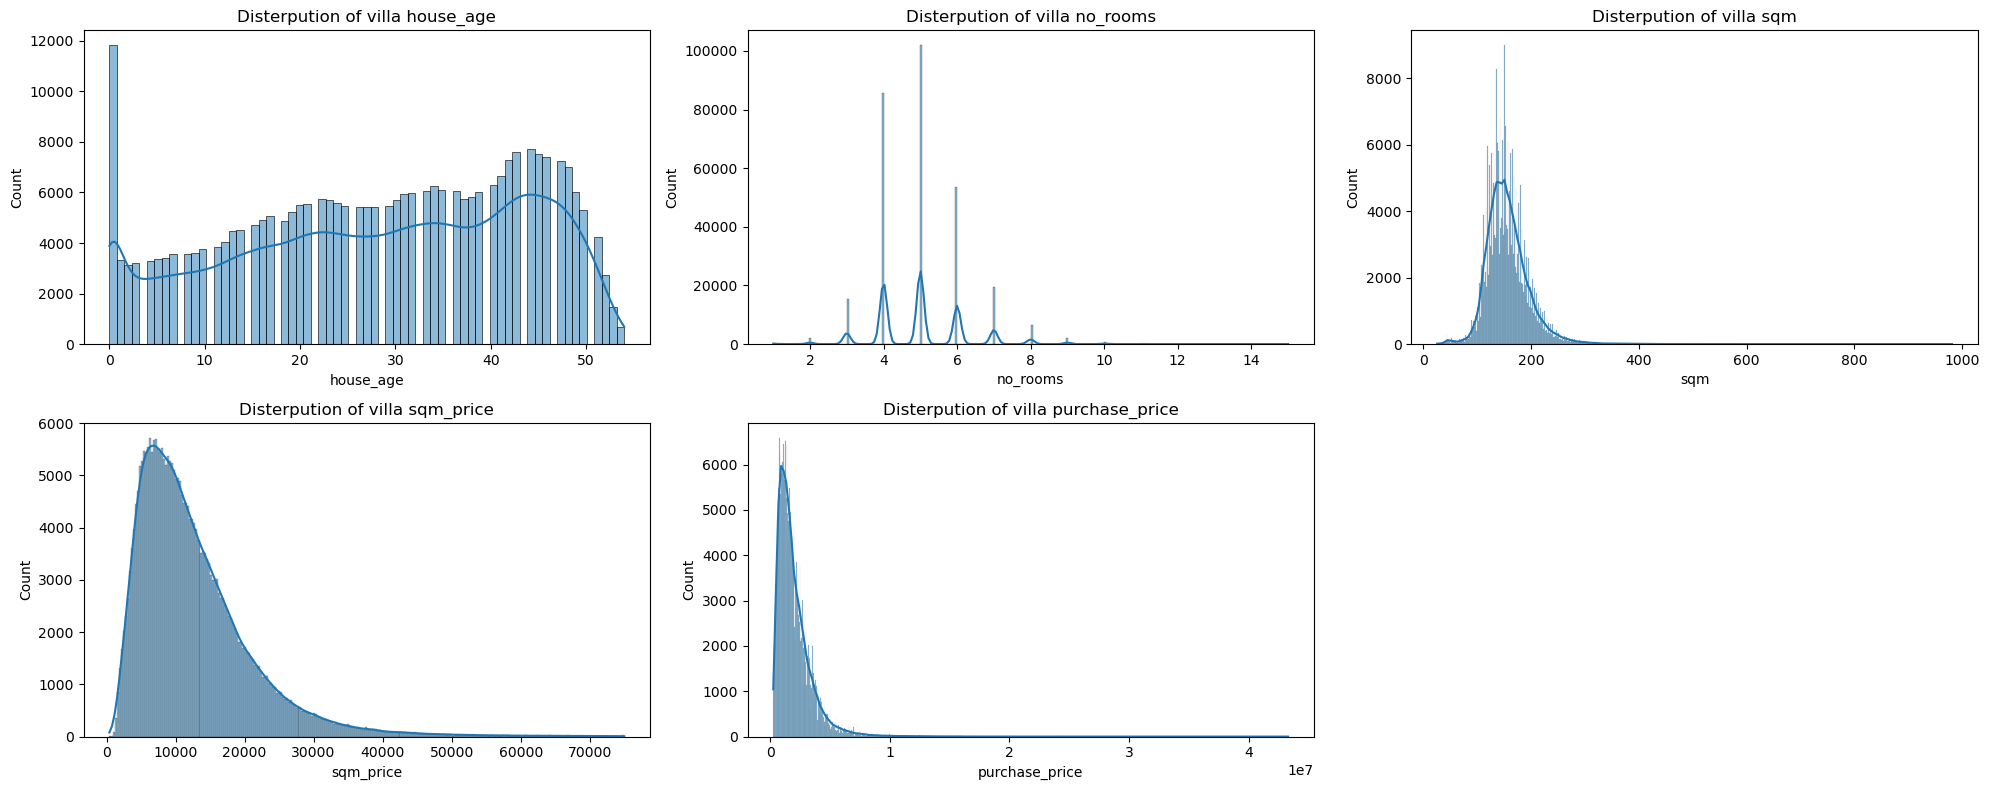

In [41]:
#Numerical data disterpution:
plt.figure(figsize=(20,8))
for e ,i in enumerate(villa_df.columns[3:]) :
    plt.subplot(2,3,e+1)
    plt.title(f"Disterpution of villa {i}")
    sns.histplot(villa_df[i], kde=True)
    plt.tight_layout();

### As we can see, the most of Villas sqm size disterpution is located between 100 to 200 meter.

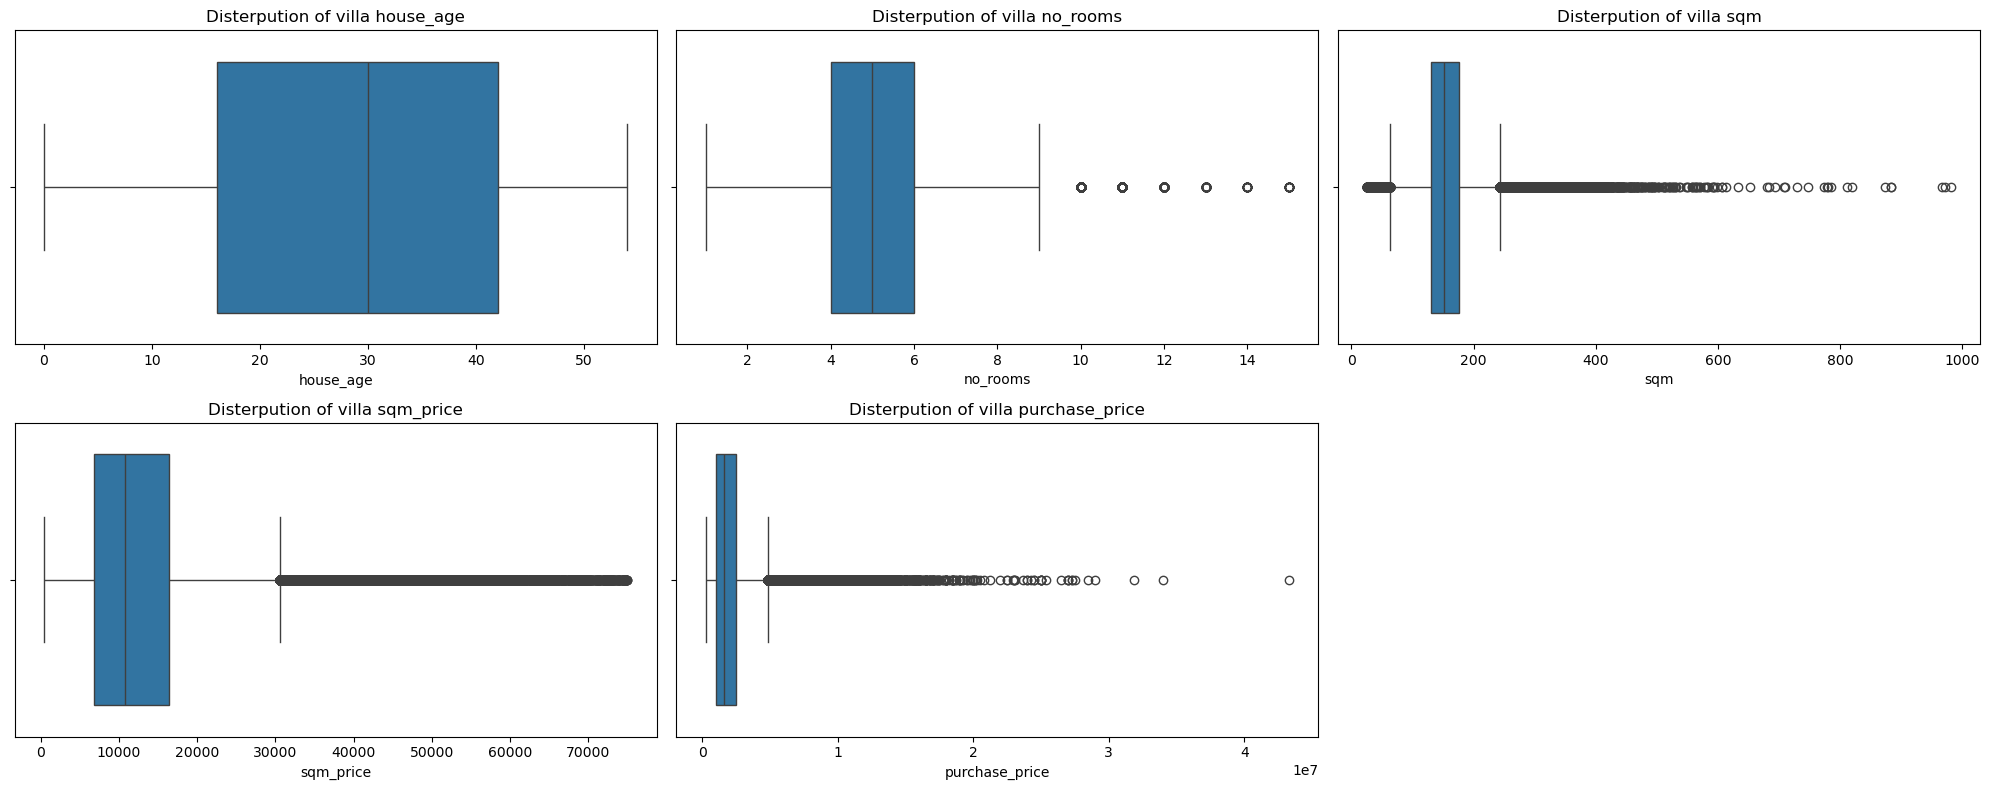

In [42]:
#Numerical data outlyers shape:
plt.figure(figsize=(20,8))
for e ,i in enumerate(villa_df.columns[3:]) :
    plt.subplot(2,3,e+1)
    plt.title(f"Disterpution of villa {i}")
    sns.boxplot(x=villa_df[i])
    plt.tight_layout();

<h2 style="text-align: center;"><strong>correlation coefficient between Villas feature data columns</strong></h2>

In [43]:
#corr_villa is a new df with villa features columns.
corr_villa = villa_df[["house_age","no_rooms","sqm","sqm_price","purchase_price"]]

In [44]:
# sns.pairplot(corr_villa , kind="reg");

<Axes: >

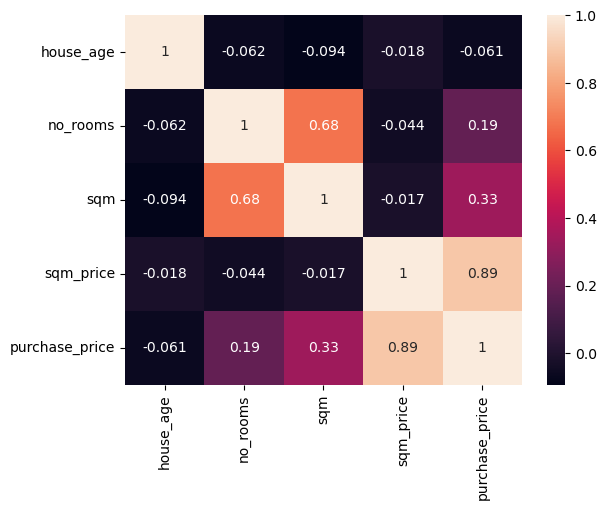

In [45]:
sns.heatmap(corr_villa.corr() , annot=True )

<h2 style="text-align: center;">There is a strong positive correlation between  sqm_price and purchase_price by (0.89)</h2>

<h3>&rarr;So i will check <strong>"sqm price"</strong> for each <strong>"city &amp; region"</strong> to be able to determine which region and which city has high price for Villas sqm.</h3>

In [46]:
display(px.bar(villa_df.groupby(["region"])["sqm_price"].median().sort_values(ascending=False).round(2),text_auto=True,title="Region sqm Avg price for Villas").update_layout(title_x=0.5))
display(px.bar(villa_df.groupby(["region"])["sqm_price"].agg(["count","mean"]).sort_values(by="mean",ascending=False).reset_index(), x="region", y="count", text_auto=True, title="Sold Villas Count per Rgion").update_layout(title_x=0.5))

<h3 style="text-align: justify;">&rArr; Zealand region is ranking as the top region in Villa Avg sqm price by around 14.4K per meter followed by Fyn&amp;Island region by around 10 K per meter.</h3>
<div>

<h3 style="text-align: justify;">&rArr; Jutland region is ranking as the top region in sold Villas count by around 173 K sold units followed by Zealand region by around 88 K sold units.</h3>
<div>

In [47]:
display(px.bar(villa_df.groupby(["city"])["sqm_price"].mean().sort_values(ascending=False).round(2).head(30),text_auto=True,title="City sqm mean price for Villas").update_layout(title_x=(0.5)))
display(px.bar(villa_df.groupby(["city"])["sqm_price"].agg(["count","mean"]).sort_values(by="mean",ascending=False).reset_index(), x="city", y="count", text_auto=True, title="Sold Villas count per Rgion (desc sort by avg sqm price)").update_layout(title_x=0.5))


<h3 style="text-align: justify;"> &rArr; Nordhaven city is ranking as the 1st city in Villa Avg sqm price by around 69K per meter followed by Aarhus city by around 49 K per meter.</h3>
</div>

In [48]:
df["sqm_price"][df["city"] == "Hinnerup"].describe()

count     2461.000000
mean     14711.683983
std       8240.440568
min       1338.912109
25%       8021.390137
50%      14328.704102
75%      20621.468750
max      73214.289062
Name: sqm_price, dtype: float64

In [49]:
df["sqm_price"][df["region"] == "Zealand"].describe()


count    244312.000000
mean      19890.738138
std       13234.897549
min         327.291046
25%       10103.054932
50%       16956.521484
75%       26360.607422
max       75000.000000
Name: sqm_price, dtype: float64

In [50]:
display(px.box(df["sqm_price"][df["city"] == "Hinnerup"], x=df["sqm_price"][df["city"] == "Hinnerup"].values,title="Hinnerup City sqm price outlyers" ).update_layout(title_x=0.5))
display(px.box(df["sqm_price"][df["region"] == "Zealand"], x=df["sqm_price"][df["region"] == "Zealand"].values,title="Zealand Reagion sqm price outlyers").update_layout(title_x=0.5))

 <h1 style="text-align: center;"><strong>Apartments Data Disterpution</strong></h1> 

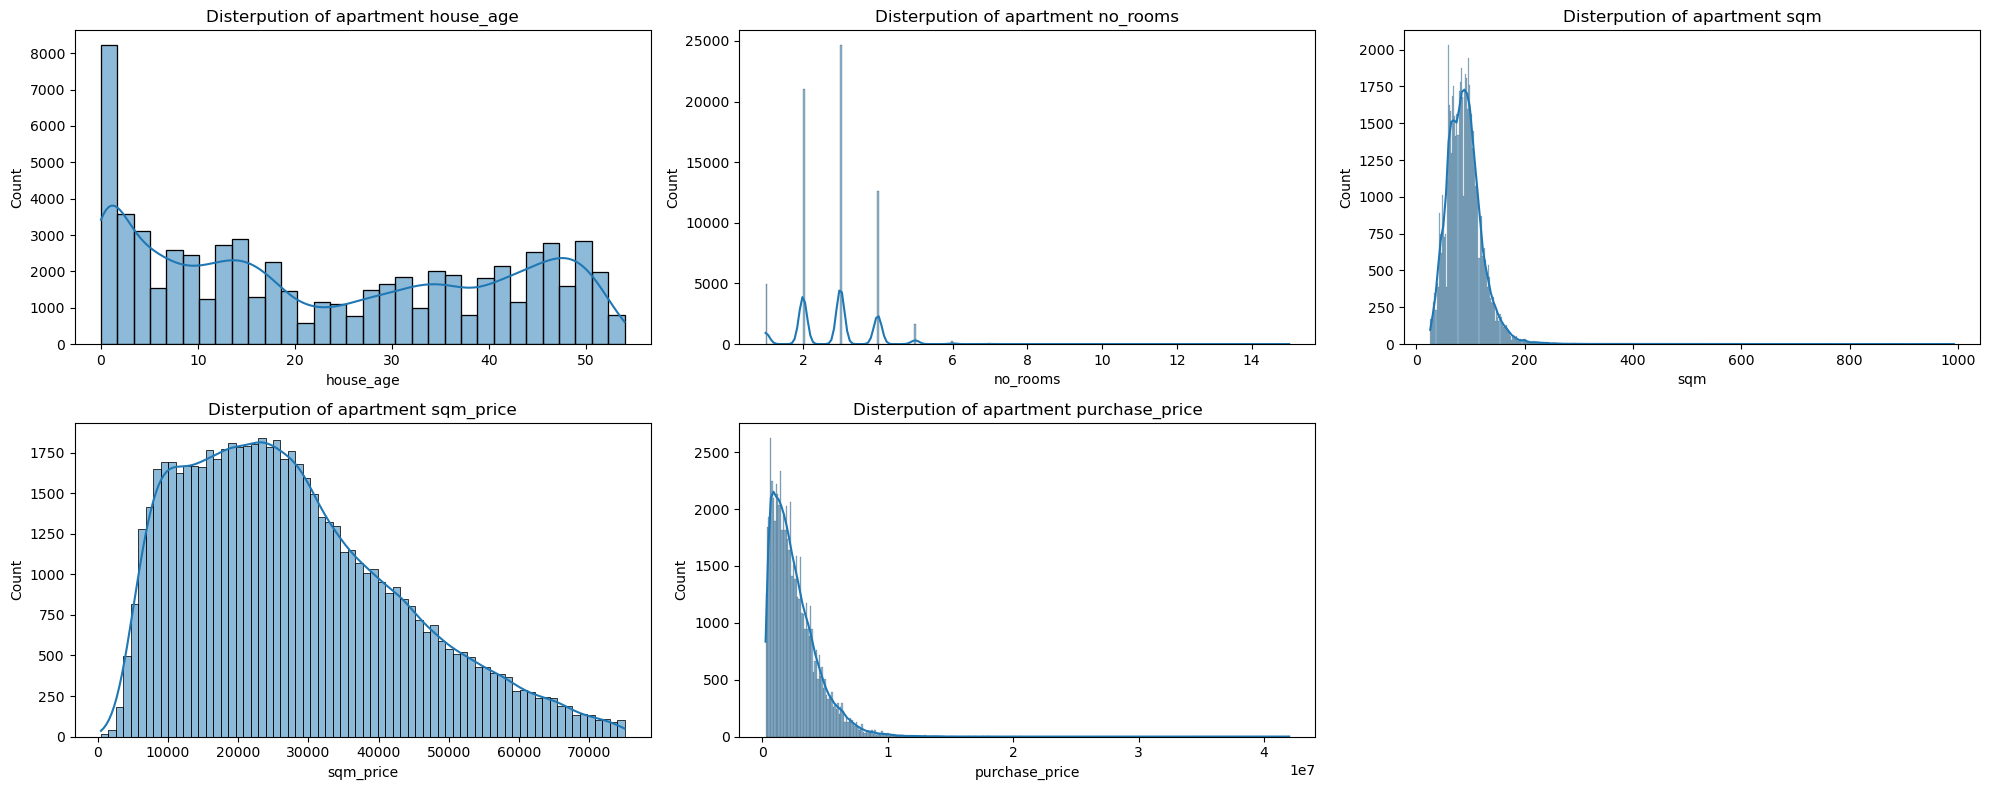

In [51]:
#Numerical data disterpution:
plt.figure(figsize=(20,8))
for e ,i in enumerate(apartment_df.columns[3:]) :
    plt.subplot(2,3,e+1)
    plt.title(f"Disterpution of apartment {i}")
    sns.histplot(apartment_df[i], kde=True)
    plt.tight_layout();

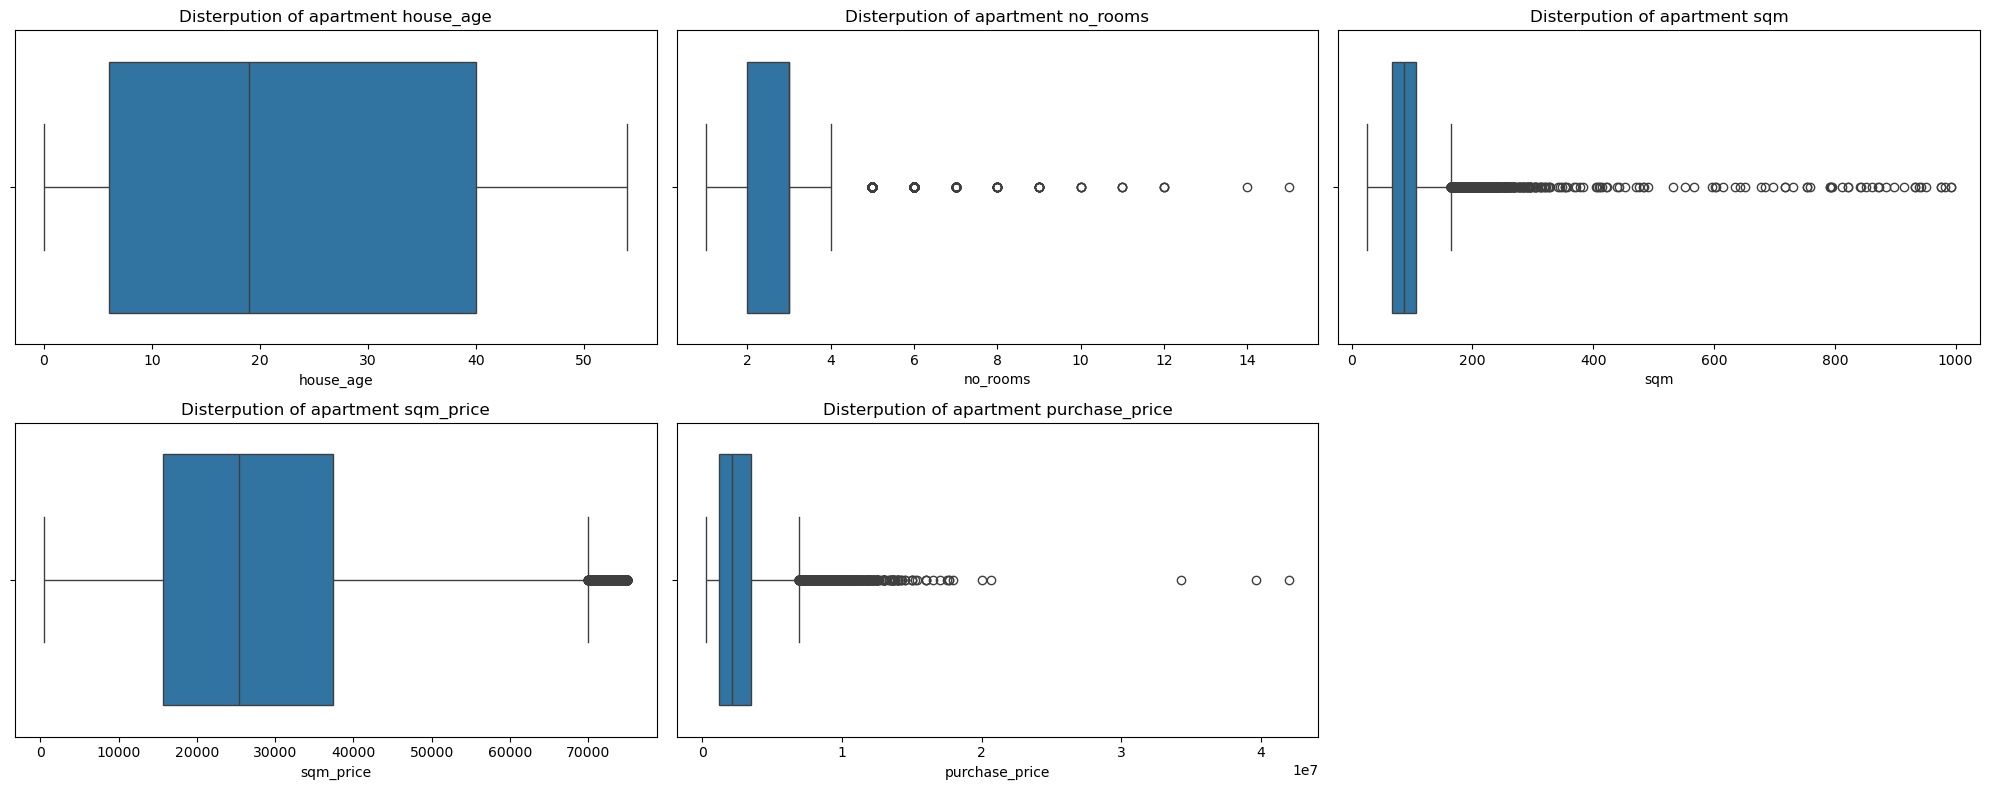

In [52]:
#Numerical data outlyers shape:
plt.figure(figsize=(20,8))
for e ,i in enumerate(apartment_df.columns[3:]) :
    plt.subplot(2,3,e+1)
    plt.title(f"Disterpution of apartment {i}")
    sns.boxplot(x=apartment_df[i])
    plt.tight_layout();

<h2 style="text-align: center;"><strong>correlation coefficient between Apartments feature data columns</strong></h2>

In [53]:
corr_apartment = apartment_df[["house_age","no_rooms","sqm","sqm_price","purchase_price"]]

In [54]:
# sns.pairplot(corr_apartment , kind="reg");

<Axes: >

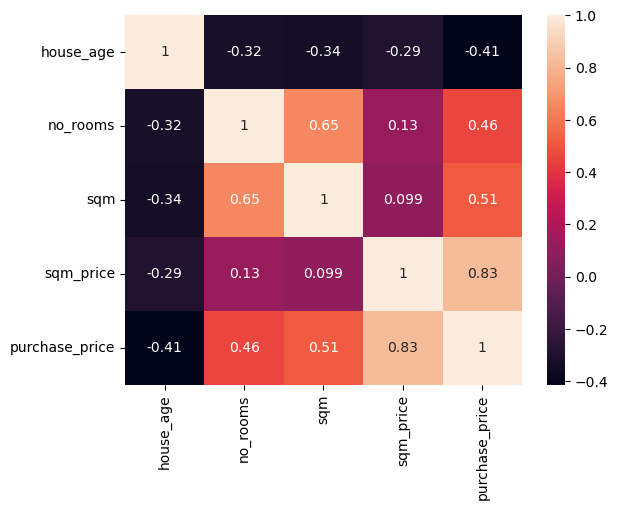

In [55]:
sns.heatmap(corr_apartment.corr() , annot=True)

<p>There is a positive correlation between apartment sqm and purchase_price by (0.51)</p>
<p>There is a moderate positive correlation between apartment no_rooms and purchase_price by (0.46)</p>
<p>There is a moderate negative correlation between house age and purchase_price by (0.41-)</p>
<p>There is a strong positive correlation between apartment sqm_price and purchase_price by (0.83)</p>

<h3>&rarr;So i will check <strong>"sqm price"</strong> for each <strong>"city &amp; region"</strong> to be able to determine which region and which city has high price for Apartments sqm.</h3>

In [56]:
display(px.bar(apartment_df.groupby(["region"])["sqm_price"].median().sort_values(ascending=False).round(2),text_auto=True,title="Region sqm Avg price for apartments").update_layout(title_x=0.5))
display(px.bar(apartment_df.groupby(["region"])["sqm_price"].agg(["count","mean"]).sort_values(by="mean",ascending=False).reset_index(), x="region", y="count", text_auto=True, title="Sold apartments Count per Rgion").update_layout(title_x=0.5))

<h3 style="text-align: justify;">&rArr; Zealand region is ranking as the top region in Apartments Avg sqm price by around 29 K per meter with 41 K sold units count, followed by Jutland region by around 19.3 K per meter with 21 K sold unit count.</h3>
<div>

In [57]:
display(px.bar(apartment_df.groupby(["city"])["sqm_price"].mean().sort_values(ascending=False).round(2).head(30),text_auto=True,title="City sqm mean price for apartments").update_layout(title_x=(0.5)))
display(px.bar(apartment_df.groupby(["city"])["sqm_price"].agg(["count","mean"]).sort_values(by="mean",ascending=False).reset_index(), x="city", y="count", text_auto=True, title="Sold apartments count per Rgion (desc sort by avg sqm price)").update_layout(title_x=0.5))


<h3 style="text-align: justify;"> &rArr; Nordhaven city is ranking as the 1st city in Villa Avg sqm price by around 69K per meter followed by Aarhus city by around 49 K per meter.</h3>
</div>

<hr />
<p>&nbsp;</p>

<h2>&loz; Our question was why the villas and apartments sold property count Ratio is (4.4) which is greater than their sales ratio (3.0).</h2>

In [58]:
display(px.bar(villa_df.groupby(["region"])["sqm_price"].median().sort_values(ascending=False).round(2),text_auto=True,title="Region sqm Avg price for Villas").update_layout(title_x=0.5))
display(px.bar(villa_df.groupby(["region"])["sqm_price"].agg(["count","mean"]).sort_values(by="mean",ascending=False).reset_index(), x="region", y="count", text_auto=True, title="Sold Villas Count per Region (desc sort by sqm price)").update_layout(title_x=0.5))
display(px.bar(apartment_df.groupby(["region"])["sqm_price"].median().sort_values(ascending=False).round(2),text_auto=True,title="Region sqm Avg price for apartments").update_layout(title_x=0.5))
display(px.bar(apartment_df.groupby(["region"])["sqm_price"].agg(["count","mean"]).sort_values(by="mean",ascending=False).reset_index(), x="region", y="count", text_auto=True, title="Sold apartments Count per Region (desc sort by sqm price)").update_layout(title_x=0.5))

In [59]:
display(px.bar(villa_df.groupby(["city"])["sqm_price"].mean().sort_values(ascending=False).round(2).head(30),text_auto=True,title="City sqm Avg price for Villas").update_layout(title_x=(0.5)))
display(px.bar(villa_df.groupby(["city"])["sqm_price"].agg(["count","mean"]).sort_values(by="mean",ascending=False).reset_index(), x="city", y="count", text_auto=True, title="Sold Villas count per Region").update_layout(title_x=0.5))
display(px.bar(apartment_df.groupby(["city"])["sqm_price"].mean().sort_values(ascending=False).round(2).head(30),text_auto=True,title="City sqm mean price for apartments").update_layout(title_x=(0.5)))
display(px.bar(apartment_df.groupby(["city"])["sqm_price"].agg(["count","mean"]).sort_values(by="mean",ascending=False).reset_index(), x="city", y="count", text_auto=True, title="Sold apartments count per Rgion").update_layout(title_x=0.5))

<hr />
<p>&nbsp;</p>

<hr />
<p>&nbsp;</p>